In [1]:
import pandas as pd

import math

from scipy.stats import norm

from matplotlib import pyplot as plt

import numpy as np

pd.options.display.min_rows = 20

pd.options.display.max_rows = 20

In [14]:
kibergrad = pd.read_csv("Kibergrad.csv")

m = len(kibergrad.index)

otroci = kibergrad["'OTROK'"]

globalno_povprecje = otroci.mean()

print(globalno_povprecje)

0.9479332816843641


In [17]:
vzorec = otroci.sample(n=200)

povprecje = vzorec.mean()

povprecje

0.975

In [21]:
cenilka_se = math.sqrt((m - 200)/(200*m))*vzorec.std()

c = norm.ppf(0.975)

delta = c*cenilka_se

print(povprecje - delta, povprecje + delta)

0.8179002058696819 1.132099794130318


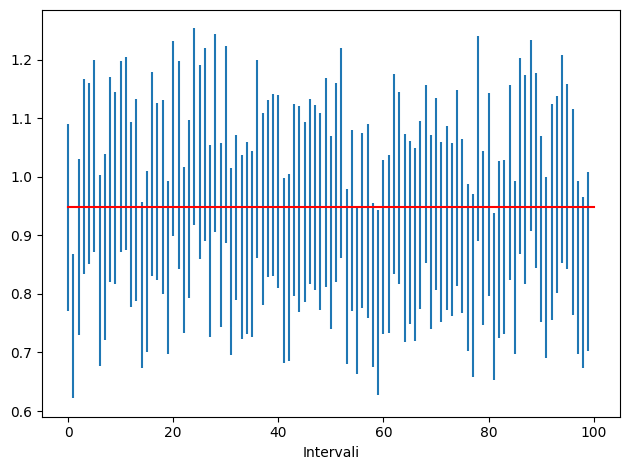

96


In [28]:
x = np.arange(100)
pomozni_x = np.linspace(0, 100, 1000)
podatki = np.empty(100)
intervali = np.empty(100)
stevec = 0

for i in range(100):
    zacasni_vzorec = otroci.sample(200)
    zacasno_povprecje = zacasni_vzorec.mean()
    zacasna_se = math.sqrt((m - 200)/(200*m))*zacasni_vzorec.std()
    podatki[i] = zacasno_povprecje
    intervali[i] = zacasna_se
    if abs(zacasno_povprecje - globalno_povprecje) <= zacasna_se*c:
        stevec += 1

fig, ax = plt.subplots()
plt.errorbar(x, podatki, yerr=intervali*c, fmt="none")
plt.plot(pomozni_x, globalno_povprecje*np.ones(1000), "r")
ax.grid(False)
ax.set_xlabel("Intervali")
plt.tight_layout()
plt.show()
print(stevec)


In [54]:
dejanska_se = math.sqrt((m - 200)/(200*(m - 1)))*otroci.std(ddof=0)

sd_povprecij = math.sqrt(sum((podatki - podatki.mean()*np.ones(100))*(podatki - podatki.mean()*np.ones(100)))*(1/100))

print(dejanska_se, sd_povprecij)

0.0816404987959038 0.07567725880342124


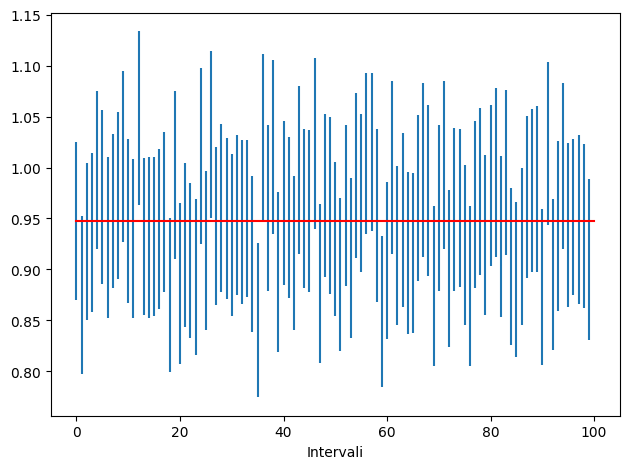

96


In [58]:
podatki_alt = np.empty(100)
intervali_alt = np.empty(100)
stevec_alt = 0

for i in range(100):
    zacasni_vzorec = otroci.sample(800)
    zacasno_povprecje = zacasni_vzorec.mean()
    zacasna_se = math.sqrt((m - 800)/(800*m))*zacasni_vzorec.std()
    podatki_alt[i] = zacasno_povprecje
    intervali_alt[i] = zacasna_se
    if abs(zacasno_povprecje - globalno_povprecje) <= zacasna_se*c:
        stevec_alt += 1

fig, ax = plt.subplots()
plt.errorbar(x, podatki_alt, yerr=intervali_alt*c, fmt="none")
plt.plot(pomozni_x, globalno_povprecje*np.ones(1000), "r")
ax.grid(False)
ax.set_xlabel("Intervali")
plt.tight_layout()
plt.show()
print(stevec_alt)

In [61]:
dejanska_se_alt = math.sqrt((m - 800)/(800*(m - 1)))*otroci.std(ddof=0)
sd_povprecij_alt = math.sqrt(sum((podatki_alt - podatki_alt.mean()*np.ones(100))*(podatki_alt - podatki_alt.mean()*np.ones(100)))*(1/99))
print(dejanska_se_alt, sd_povprecij_alt)

0.040538959874385 0.042084231538569404
